In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)
import turicreate as tc

### **Assignment 2**
### **<span style='color:blue'>Coefficients Array</span>**
#### Yanna Polonia

#### **<span style='color:blue'>a: 4 | b: 3 | c: 4 | d: 4</span>**

#### f(x) = (a + 1) $x^3 + (b + 1) x^2 + (c + 1) x$ + d
#### **<span style='color:blue'>f(x) = 5$x^3 + 4x^2 + 5x$ + 4</span>**

### ***<span style='color:blue'>Defining Dataset</span>***

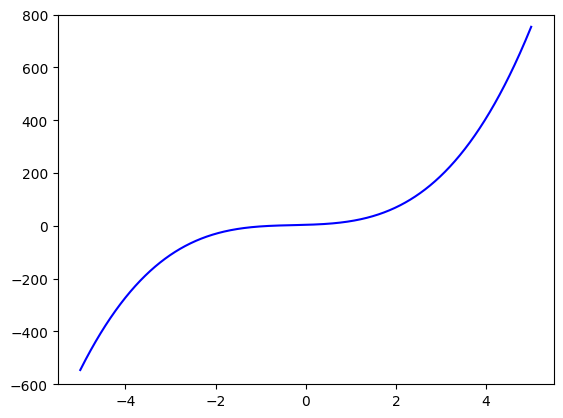

In [2]:
# Polynomial is 4 + 5x + 4x^2 + 5x^3
coefs = [4,5,4,5]

def polynomial(coefs, x):
    """
    Returning the total of coefficients(weights) for each given x value, based on the power value that corresponds for each one.
    """
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    """
    Defining x and y limits, plotting  x-y values
    """
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)    # Defining 1000 evenly spaced x-values within the given range 
    plt.ylim(-600, 800)    # Defining y-exe limits - changed to get closer look at curves
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='blue')

draw_polynomial(coefs)

In [3]:
X = []
Y = []

# Generating 500 rows of x-y data
# y-values with a random component added, using 30 for data scattering
for i in range(500):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + 30 * random.gauss(0,2)
    X.append(x)
    Y.append(y)

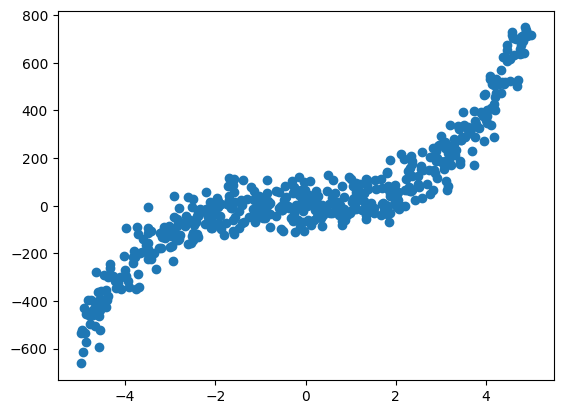

In [4]:
plt.scatter(X, Y)

### **<span style='color:blue'>Training a polynomial regression model</span>**

#### **<span style='color:blue'>Creating SFrame using x-y data</span>**

In [5]:
data = tc.SFrame({'x':X, 'y':Y})
data

x,y
3.4442185152504816,276.0908185697075
-2.4108324970703663,-117.47040607187193
0.11274721368608542,-82.20563760463095
-1.9668727392107255,30.65525782471289
-0.23403045847644144,-110.53297461973517
0.046868558173902564,-61.34222408430534
-2.1816215560029617,-36.75055570369126
-2.4949365863755943,-144.4529971322599
4.097462559682402,544.3573887778999
4.021659504395828,402.2212996977093


#### **<span style='color:blue'>Adding columns to our dataset corresponding to $𝑥^2,𝑥^3,…,𝑥^{10}$</span>**

In [6]:
# Starting in x^2 as x is already included in the SFrame
features = ['x']    # Assigning 'x' to define a list of strings, being this x power of 1
for i in range(2,11):
    string = 'x^'+str(i)    # Each 'x' to the power of i - changed the range to include x^10
    features.append(string) # Appending string to features
    data[string] = data['x'].apply(lambda x:x**i) # Each value of x to the power of i
data

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 24)"

Note that increasing the degree of parallelism also increases the memory footprint.

x,y,x^2,x^3,x^4
3.4442185152504816,276.0908185697075,11.862641180794233,40.85752839466433,140.72225578427518
-2.4108324970703663,-117.47040607187193,5.812113328930538,-14.012031690041567,33.78066134833202
0.11274721368608542,-82.20563760463095,0.012711934193975809,0.0014332351609316464,0.00016159327095197139
-1.9668727392107255,30.65525782471289,3.8685883722503025,-7.609021008606714,14.965975993910245
-0.23403045847644144,-110.53297461973517,0.05477025549469338,-0.012817908004294928,0.0029997808869539904
0.046868558173902564,-61.34222408430534,0.002196661745300489,0.0001029543687980023,4.82532282326659e-06
-2.1816215560029617,-36.75055570369126,4.759472613616784,-10.38336804907213,22.652579559768178
-2.4949365863755943,-144.4529971322599,6.224708570035504,-15.530253150907287,38.74699678187344
4.097462559682402,544.3573887778999,16.789199427999062,68.79311606326735,281.877217433124
4.021659504395828,402.2212996977093,16.173745169297295,65.04529598178058,261.5900328013676


#### **<span style='color:blue'>Splitting data:</span>**
    
##### <span style='color:blue'>* 70% training</span>
##### <span style='color:blue'>* 20% validation</span>
##### <span style='color:blue'>* 10% test</span>  


In [7]:
# Getting the 70% required for the train set
train, leftover = data.random_split(.7, seed=0)

In [8]:
# Of the leftover (30%), getting 2/3 ~ 20% for the validation set, leaving the remaining part for testing
validation, test = leftover.random_split(2/3, seed=0)

In [9]:
def modified_display_results(model):
    coefs = model.coefficients    # Obtaining model's coefficients
    print("Training error (rmse):", model.evaluate(train)['rmse'])
    print("Validation error (rmse):", model.evaluate(validation)['rmse'])
    plt.scatter(train['x'], train['y'], marker='o')    # Ploting training values
    plt.scatter(validation['x'], validation['y'], marker='^')    # Ploting validation values
    draw_polynomial(coefs['value'])
    plt.show()
    print("Polynomial coefficients")
    print(coefs['name', 'value'])

#### **<span style='color:blue'>Creating and displaying model_elastic_reg with 0.1 as L1/L2 penalty value</span>**

In [10]:
model_elastic_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.1, l2_penalty=0.1, verbose=False, validation_set=validation)

Training error (rmse): 63.730793825233434
Validation error (rmse): 69.06248563581744


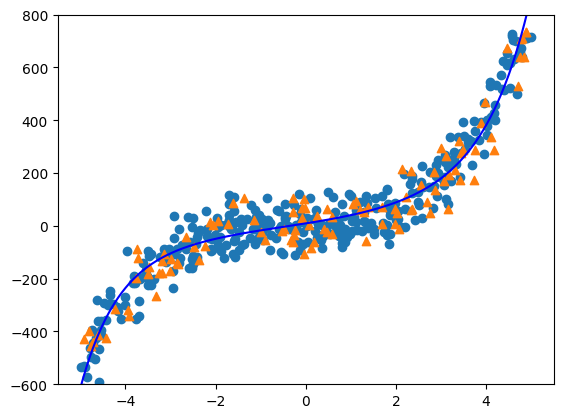

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   9.406816850480139    |
|      x      |   27.22094677312059    |
|     x^2     |   2.275796791327818    |
|     x^3     |   1.5582337185109678   |
|     x^4     |  0.08186845230850641   |
|     x^5     |   0.0561176163927451   |
|     x^6     | 0.0019297387275423537  |
|     x^7     | 0.0017700736491625124  |
|     x^8     | 1.0613129208328347e-05 |
|     x^9     | 5.066104893899386e-05  |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [11]:
modified_display_results(model_elastic_reg)

#### **<span style='color:blue'>Based on RMSE values and the plot obtained, the model is underfitting</span>**

#### **<span style='color:blue'>Creating optimal_model, having three different values for L1 and L2 and evaluating them on each degree value we have</span>**

Model   n    L1    L2  Train RMSE  Validation RMSE
  1     1     0     1    117.46        120.57
  2     1   0.1   0.1    117.45        120.59
  3     1     1     0    117.45        120.59
  4     2     0     1    114.35        114.28
  5     2   0.1   0.1    114.35        114.21
  6     2     1     0    114.35        114.21
  7     3     0     1      60.3         66.15
  8     3   0.1   0.1     63.27         67.53
  9     3     1     0     63.26         67.53
 10     4     0     1     60.28         66.28
 11     4   0.1   0.1     63.43         66.81
 12     4     1     0     63.42         66.81
 13     5     0     1     60.38          66.7
 14     5   0.1   0.1     61.63         66.82
 15     5     1     0     61.63         66.83
 16     6     0     1      60.2         67.06
 17     6   0.1   0.1     61.73         66.65
 18     6     1     0     61.73         66.66
 19     7     0     1     60.19         67.02
 20     7   0.1   0.1      63.2         68.65
 21     7     1     0      63

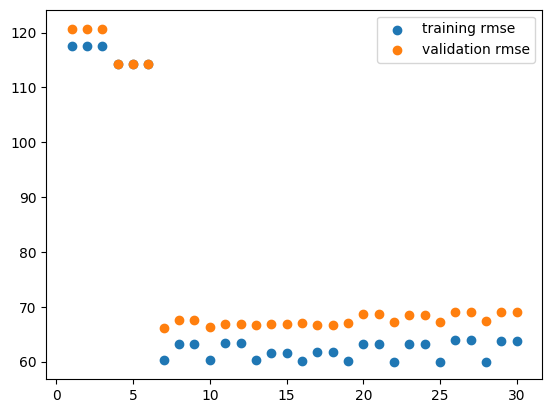

In [12]:
train_error = []    # Stores train error for each model
val_error = []      # Stores validation error for each model
model = []          # Stores a value to identify/differentiate each model.
grid_search = []    # Stores the grid_search

# Populating teh grid search, assigning three pair of fixed values for L1 and L2, for each degree.
for num in range (1 , 11):
    grid_search.append({'n': num, 'L1': 0, 'L2': 1})
    grid_search.append({'n': num, 'L1': 0.1, 'L2': 0.1})
    grid_search.append({'n': num, 'L1': 1, 'L2': 0})
            
print('Model   n    L1    L2  Train RMSE  Validation RMSE')

# Looping to train optimal_model with grid_search values
for index in grid_search:
    optimal_model = tc.linear_regression.create(
        train, 
        target = 'y', 
        l1_penalty = index['L1'], 
        l2_penalty = index['L2'], 
        verbose = False, 
        validation_set = validation, 
        features = features[0:index['n']])    # Defining amount of features to have
    train_error.append(optimal_model.evaluate(train)['rmse'])    # Adding train error to the list
    val_error.append(optimal_model.evaluate(validation)['rmse'])   # Adding validation error to the list
    i = len(train_error) - 1    # Stores index/position for each list (all of them with same length).
    model.append(i + 1)    # Stores model's number, a way to identify each one - starting from 1
    print(f"{model[i]: > 3} {index['n']: > 5} {index['L1']: > 5} {index['L2']: > 5} {round(train_error[i],2): > 9} {round(val_error[i],2): > 13}")
    
# Plotting each model within is training and validation error
plt.scatter(model, train_error)
plt.scatter(model, val_error)
plt.legend(['training rmse', 'validation rmse'])

#### **<span style='color:blue'>Based on RMSE values, complexity based on degree and scatter plot shown above, the best option is model 8 (smaller values on RMSE, less overfitting and degree not that big so we end up having less complexity). That's why our next move is to redifined optimal model to keep just model's 8 values</span>**

Training error (rmse): 63.26612461493817
Validation error (rmse): 67.53158016447153


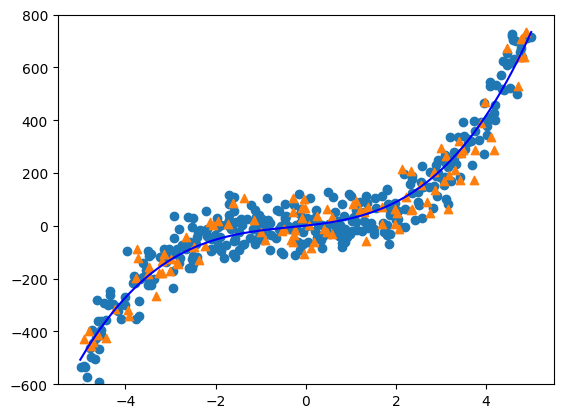

Polynomial coefficients
+-------------+--------------------+
|     name    |       value        |
+-------------+--------------------+
| (intercept) | 0.9922325788568622 |
|      x      | 18.805391664045867 |
|     x^2     | 4.5057118164369525 |
|     x^3     | 4.211805545311248  |
+-------------+--------------------+
[4 rows x 2 columns]



In [13]:
optimal_model = tc.linear_regression.create(
    train, target='y', l1_penalty=0.1, l2_penalty=0.1, verbose=False, validation_set=validation, features=features[0:3])
modified_display_results(optimal_model)

#### **<span style='color:blue'>optimal_model performs better than model_elastic_reg, being the first one less underfitting than the second one mentioned. Based on what was said, using optimal_model below to calculate the error on the testing data</span>**

In [14]:
test_error = optimal_model.evaluate(test)
test_error

{'max_error': 182.41980438313558, 'rmse': 56.872351950051645}